<a href="https://www.kaggle.com/code/leonidasemman/alzheimer-s-disease-statistical-analysis?scriptVersionId=223228443" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Alzheimer's Disease Statistical Analysis

In this notebook we are going to deep into alzheimer's disease dataset. This dataset contains extensive health information for 2,149 patients, each uniquely identified with IDs ranging from 4751 to 6900. The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, symptoms, and a diagnosis of Alzheimer's Disease. The data is ideal for researchers and data scientists looking to explore factors associated with Alzheimer's, develop predictive models, and conduct statistical analyses.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


## Data Cleaning

In [3]:
df.shape
plt.style.use('ggplot')

In [4]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [6]:
any(df.isnull().sum())

False

- There are no null values in the dataset

In [7]:
df['DoctorInCharge'].nunique()

1

- `PatientId` and `DoctorInCharge` columns do not provide any information about the data, so we are going to drop them.

In [8]:
df.drop('PatientID', axis=1, inplace=True)
df.drop('DoctorInCharge', axis=1, inplace=True)
df.shape

(2149, 33)

## Exploratory Data Analysis

### Discrete and Continuous Variables in the Dataset

In order to simplify our data exploration, we are going to split the data into discrete and continuous variables and create the respective plots.  
To achieve this, let's see how many unique values each feature has

In [9]:
df.nunique()

Age                            31
Gender                          2
Ethnicity                       4
EducationLevel                  4
BMI                          2149
Smoking                         2
AlcoholConsumption           2149
PhysicalActivity             2149
DietQuality                  2149
SleepQuality                 2149
FamilyHistoryAlzheimers         2
CardiovascularDisease           2
Diabetes                        2
Depression                      2
HeadInjury                      2
Hypertension                    2
SystolicBP                     90
DiastolicBP                    60
CholesterolTotal             2149
CholesterolLDL               2149
CholesterolHDL               2149
CholesterolTriglycerides     2149
MMSE                         2149
FunctionalAssessment         2149
MemoryComplaints                2
BehavioralProblems              2
ADL                          2149
Confusion                       2
Disorientation                  2
PersonalityCha

In [10]:
numerical = []
categorical = []
for col in df.columns:
    if df[col].nunique() > 4:
        numerical.append(col)
    else:
        categorical.append(col)

print(f'Numerical Variables: {len(numerical)}')
print(f'Categorical Variables: {len(categorical)}')

Numerical Variables: 15
Categorical Variables: 18


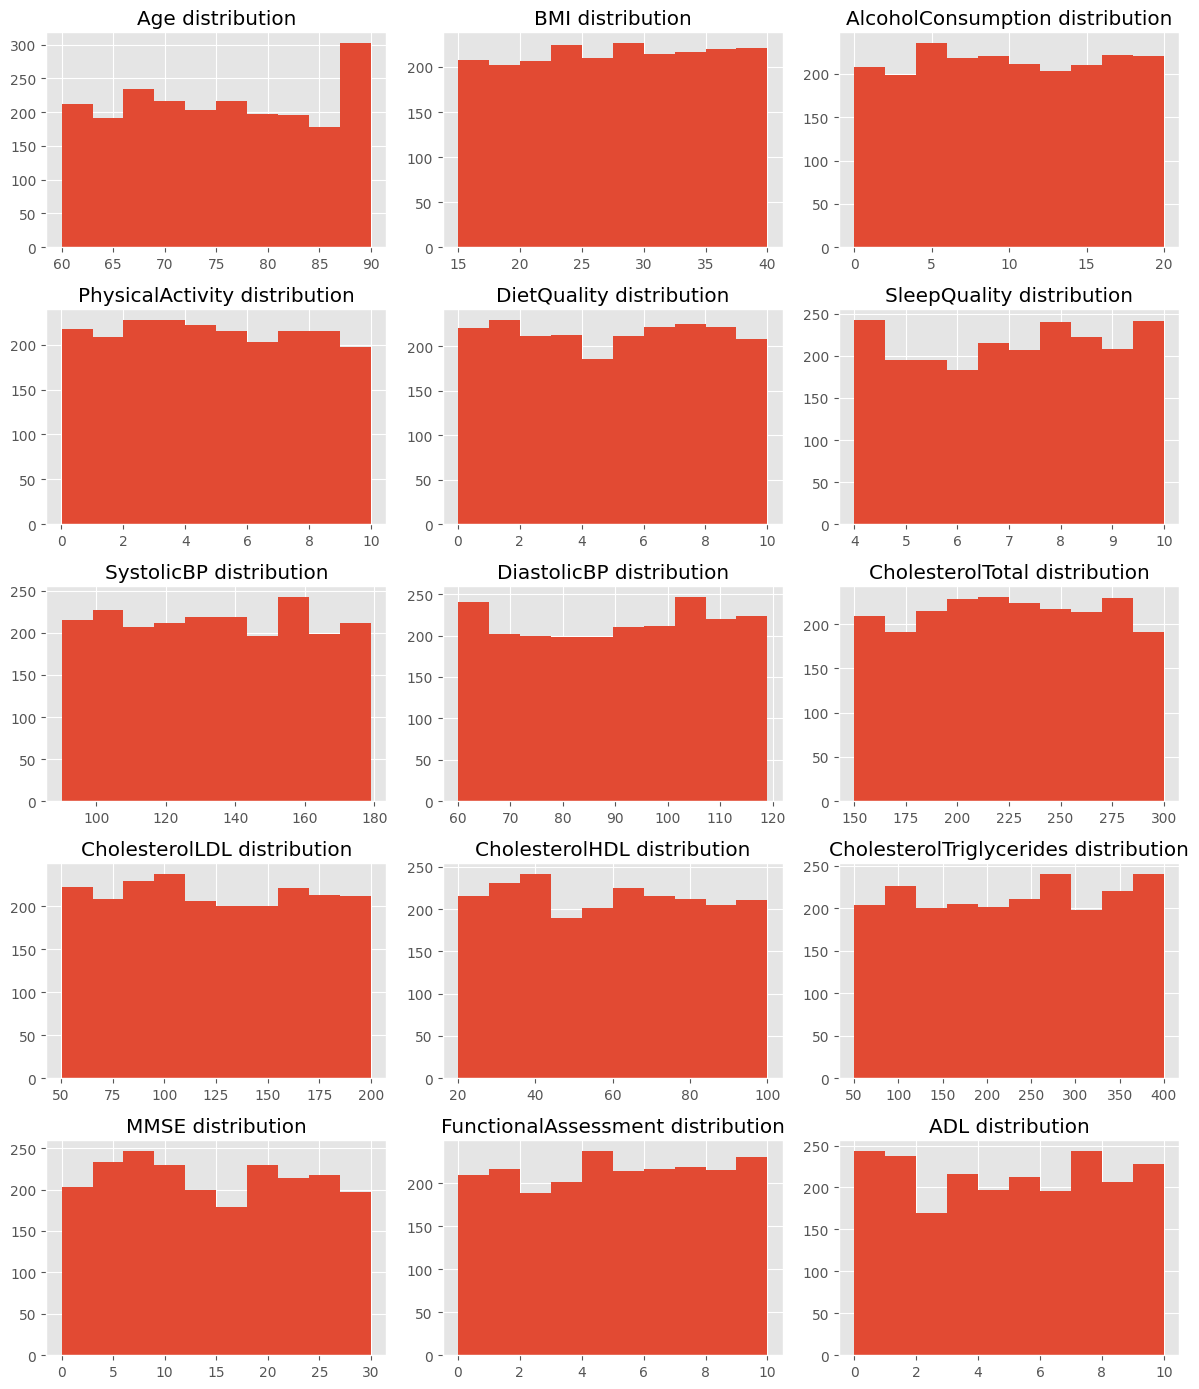

In [11]:
plt.figure(figsize=(12,14))
for i, col in enumerate(numerical, 1):
    plt.subplot(5,3,i)
    plt.hist(df[col])
    plt.title(f'{col} distribution')

plt.tight_layout()
plt.show()

- We observe that most of the numerical variables tend to follow the uniform distribution.
- The variable `Age` contains values that are in range 60 to 90. In other words, the dataset consists of elderly people.

In [12]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.91,8.99,60.00,67.00,75.00,83.00,90.00
Gender,2149.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
Ethnicity,2149.0,0.70,1.00,0.00,0.00,0.00,1.00,3.00
EducationLevel,2149.0,1.29,0.90,0.00,1.00,1.00,2.00,3.00
BMI,2149.0,27.66,7.22,15.01,21.61,27.82,33.87,39.99
Smoking,2149.0,0.29,0.45,0.00,0.00,0.00,1.00,1.00
AlcoholConsumption,2149.0,10.04,5.76,0.00,5.14,9.93,15.16,19.99
PhysicalActivity,2149.0,4.92,2.86,0.00,2.57,4.77,7.43,9.99
DietQuality,2149.0,4.99,2.91,0.01,2.46,5.08,7.56,10.00
SleepQuality,2149.0,7.05,1.76,4.00,5.48,7.12,8.56,10.00


- Next we will explore the distribution of each categorical feature

### Categorical Features Explanation 
- **1** indicates **Yes** and **0** indicates **No**.
- `Gender`: **0** represents **Male** and **1** represents **Female**
  
- `Ethnicity`: The ethnicity of the patients, coded as follows:
  - `0`: Caucasian
  - `1`: African American
  - `2`: Asian
  - `3`: Other
        
- `EducationLevel`: The education level of the patients, coded as follows:
  - `0`: None
  - `1`: High School
  - `2`: Bachelor's
  - `3`: Higher


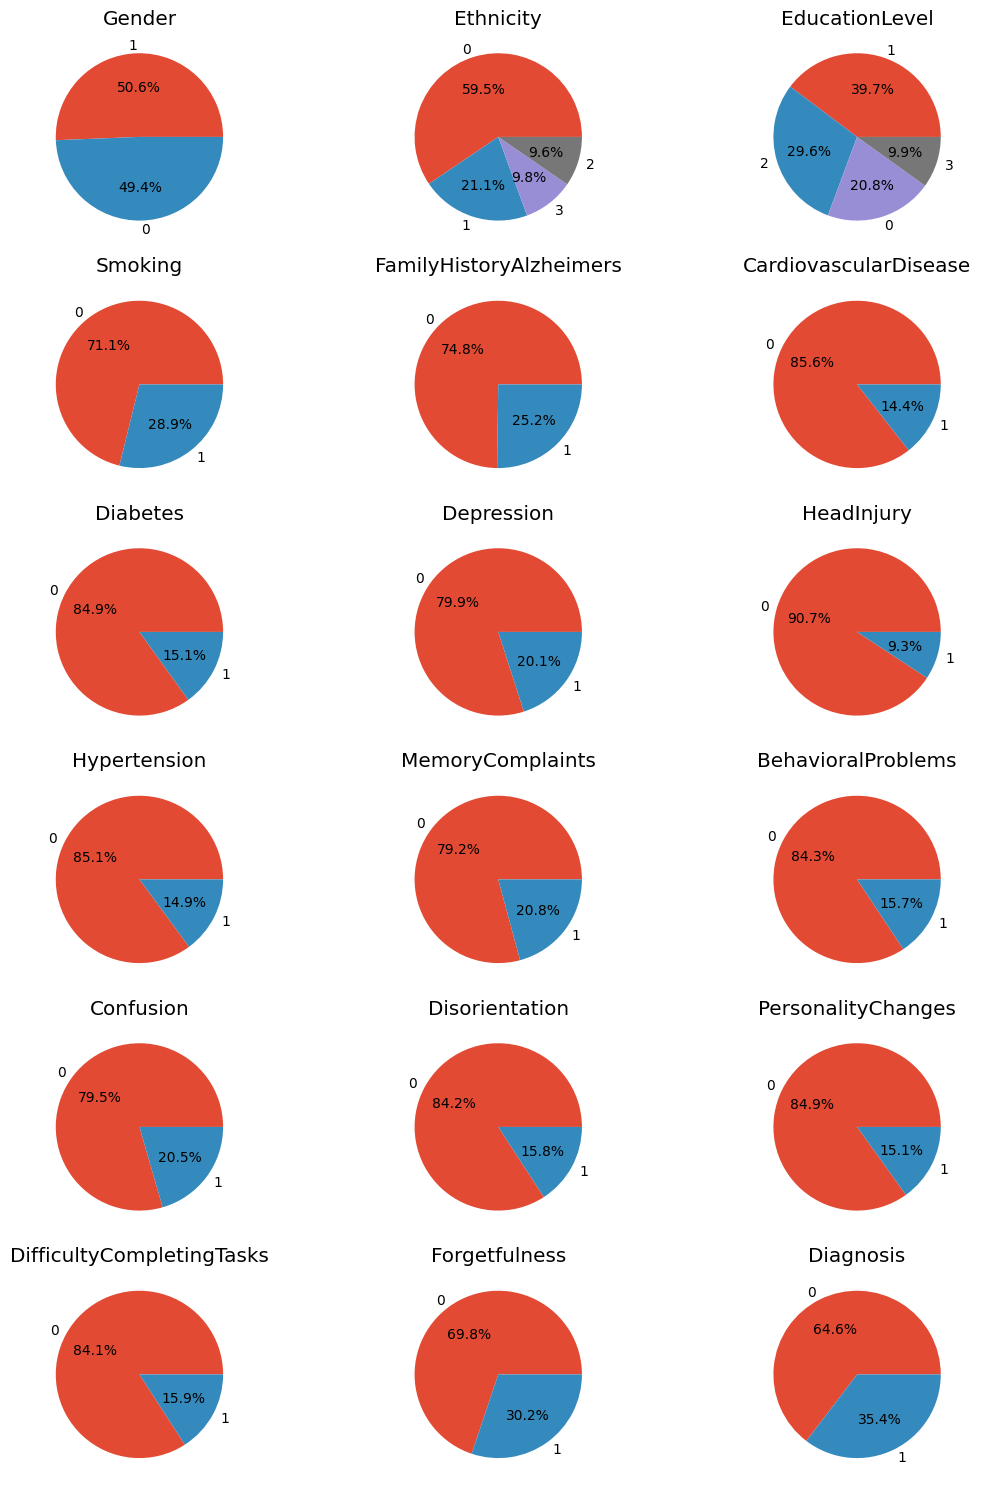

In [13]:
plt.figure(figsize=(12,15))
for i, col in enumerate(categorical, 1):
    plt.subplot(6,3,i)
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.ylabel('')  
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

The variable that we are interested in is `Diagnosis`.   
We are going to discover patterns and find relationships with the other features in the data.

Diagnosis - Frequency Table
Diagnosis
0    1389
1     760
Name: count, dtype: int64


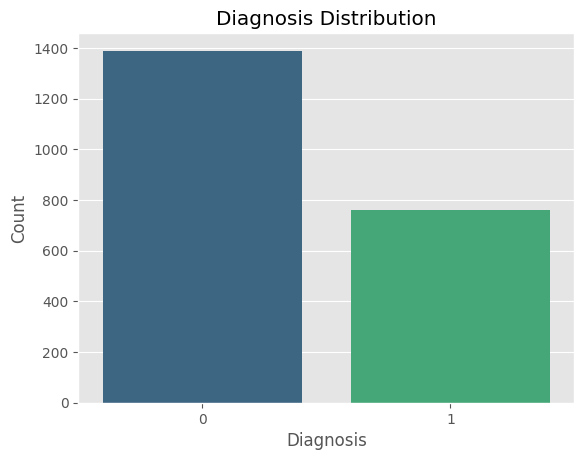

In [14]:
print('Diagnosis - Frequency Table')
print(df['Diagnosis'].value_counts())
sns.countplot(x='Diagnosis', data=df, palette='viridis')

plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis Distribution')
plt.show()

### Categorical Variables by `Diagnosis`

In [15]:
# Crosstabulation Matrices
crosstab_dict = {}

for var in categorical[:-1]:
    crosstab_dict[var] = pd.crosstab(df['Diagnosis'], df[var], normalize='columns') * 100

final_df = pd.concat(crosstab_dict, axis=1)
final_df = final_df.round(2)
final_df.T

Diagnosis                        0      1
Gender                    0  63.62  36.38
                          1  65.62  34.38
Ethnicity                 0  63.77  36.23
                          1  67.84  32.16
                          2  59.22  40.78
                          3  68.25  31.75
EducationLevel            0  60.99  39.01
                          1  64.64  35.36
                          2  65.88  34.12
                          3  68.54  31.46
Smoking                   0  64.49  35.51
                          1  65.00  35.00
FamilyHistoryAlzheimers   0  63.72  36.28
                          1  67.34  32.66
CardiovascularDisease     0  65.25  34.75
                          1  60.97  39.03
Diabetes                  0  64.00  36.00
                          1  68.21  31.79
Depression                0  64.49  35.51
                          1  65.20  34.80
HeadInjury                0  64.31  35.69
                          1  67.84  32.16
Hypertension              0  65.34  34.66
                          1  60.62  39.38
MemoryComplaints          0  72.15  27.85
                          1  36.02  63.98
BehavioralProblems        0  69.26  30.74
                          1  39.76  60.24
Confusion                 0  64.17  35.83
                          1  66.44  33.56
Disorientation            0  64.12  35.88
                          1  67.35  32.65
PersonalityChanges        0  64.22  35.78
                          1  66.98  33.02
DifficultyCompletingTasks 0  64.82  35.18
                          1  63.64  36.36
Forgetfulness             0  64.62  35.38
                          1  64.66  35.34

- We created crosstabulation matrices for each variable against the target variable, `Diagnosis`. The results reveal that individuals diagnosed with Alzheimer’s exhibit different frequency distributions in relation to `BehaviorProblems` and `MemoryComplaints`, suggesting a significant association between these variables and the disease.
- We are going to test if these differences are statistically significant using the **Chi-Square test**

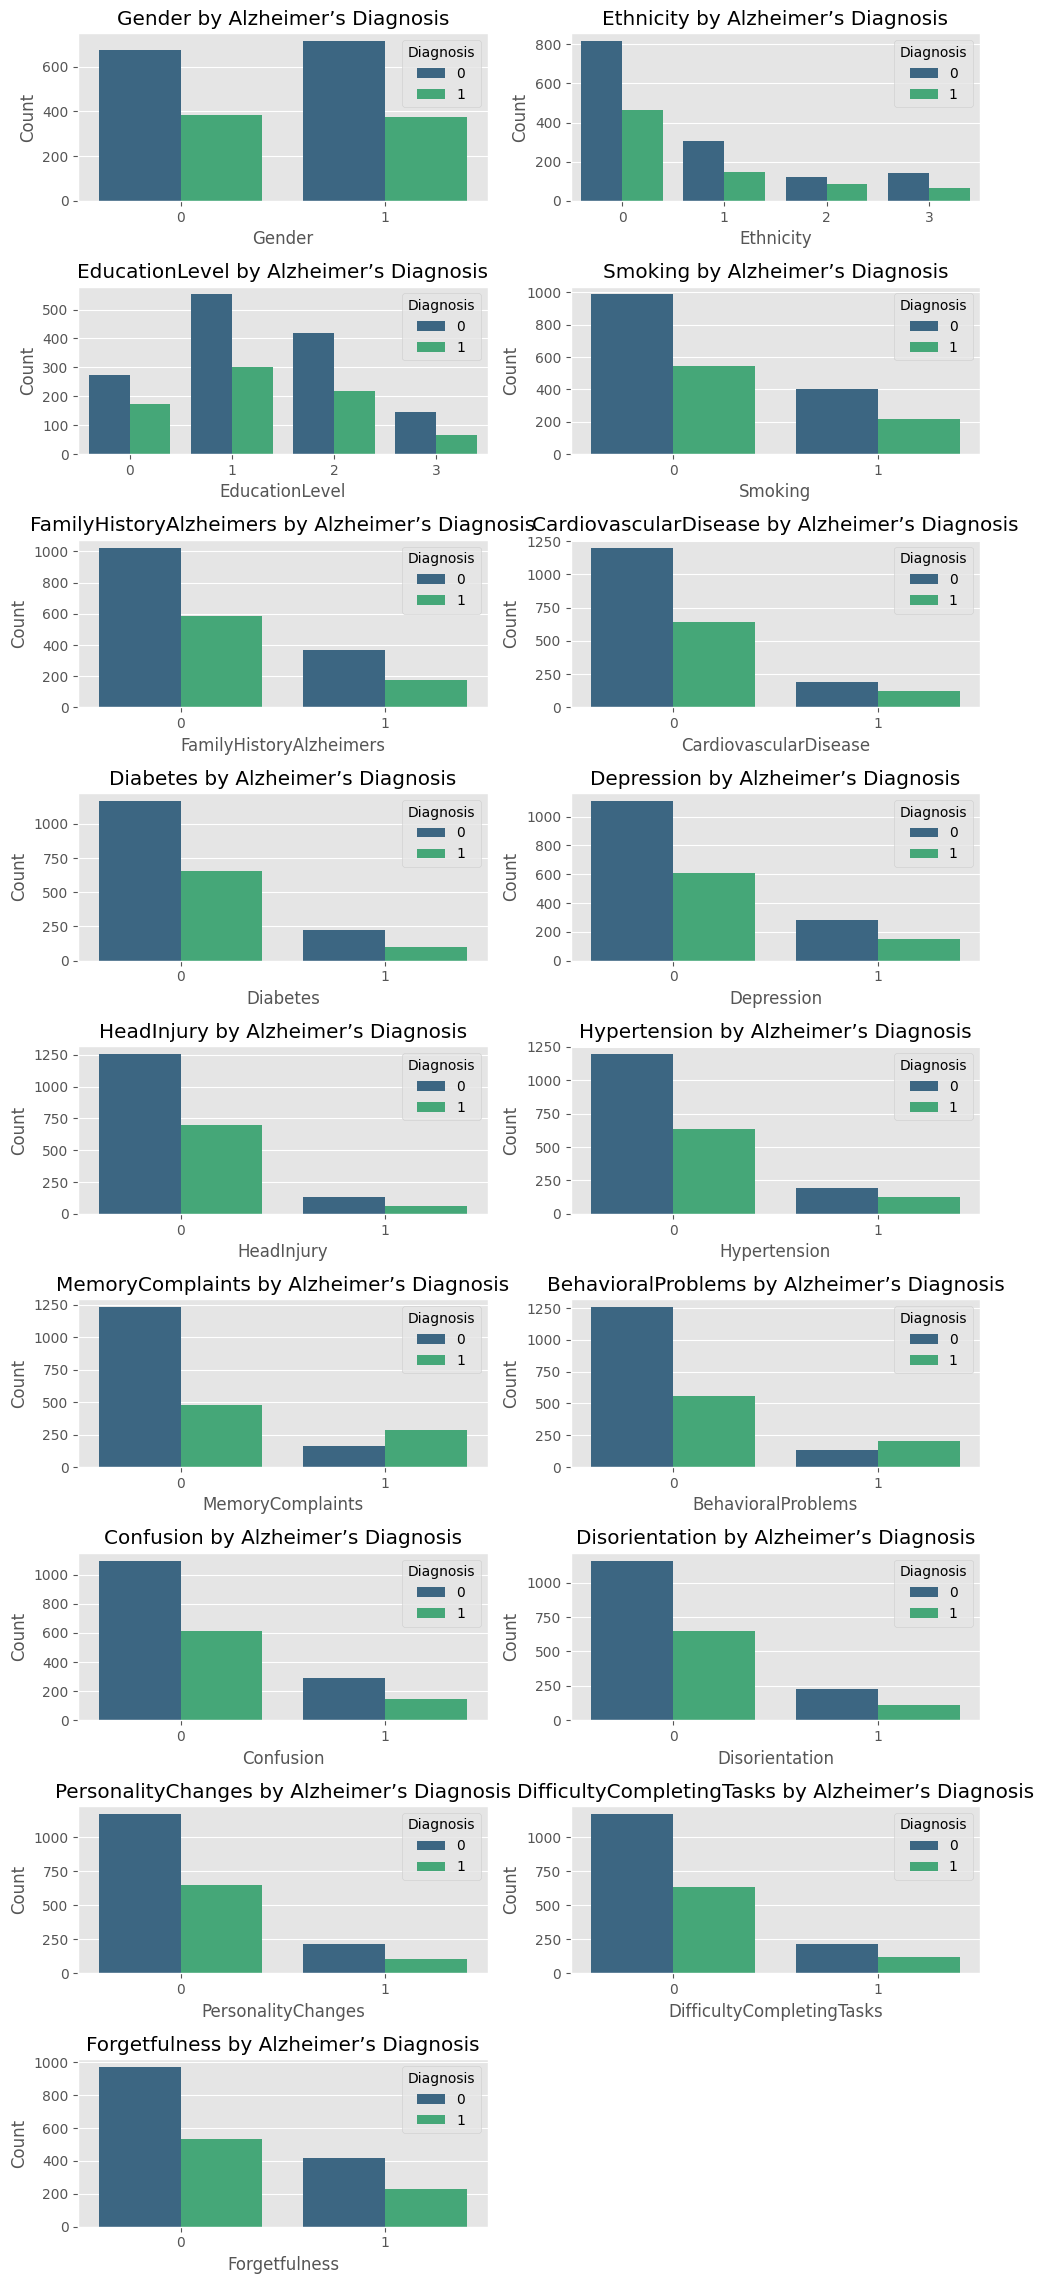

In [16]:
plt.figure(figsize=(10,25))
for j, i in enumerate(categorical[:-1], 1):
    plt.subplot(10,2,j)
    sns.countplot(x=i, hue='Diagnosis', data=df, palette='viridis')
    plt.title(f'{i} by Alzheimer’s Diagnosis')
    plt.xlabel(f'{i}')
    plt.ylabel('Count')
    
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

From the comparison bar plots, we observe that the only variables that may be correlated with Alzheimer's disease are `MemoryComplaints` and `BehavioralProblems`. People with these conditions have a higher frequency of being diagnosed with Alzheimer's disease.

## Statistical Tests

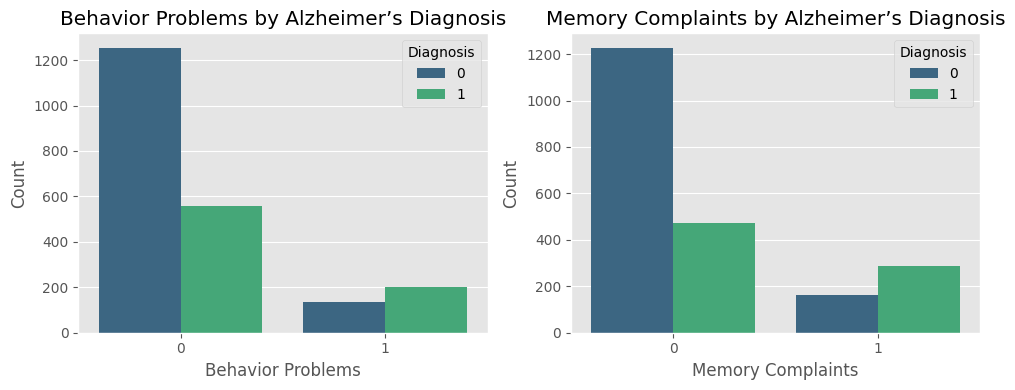

In [17]:
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.countplot(x='BehavioralProblems', hue='Diagnosis', data=df, palette='viridis')
plt.title('Behavior Problems by Alzheimer’s Diagnosis')
plt.xlabel('Behavior Problems')
plt.ylabel('Count')
plt.legend(title='Diagnosis')

plt.subplot(1,2,2)
sns.countplot(x='MemoryComplaints', hue='Diagnosis', data=df, palette='viridis')
plt.title('Memory Complaints by Alzheimer’s Diagnosis')
plt.xlabel('Memory Complaints')
plt.ylabel('Count')
plt.legend(title='Diagnosis')

plt.tight_layout()
plt.show()

Now let's see if there is significant association between these factors and the Alzheimer's disease.

### Chi-Square Test

In [18]:
# Memory Complaints & ALzheimer Diagnosis
memory_diag = pd.crosstab(df['Diagnosis'], df['MemoryComplaints'])
print(memory_diag)

chi2, p, dof, expected = chi2_contingency(memory_diag)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

if p<0.05: 
    print("There is a significant association between memory complaints and Alzheimer's disease")
else:
    print('There is no association')


MemoryComplaints     0    1
Diagnosis                  
0                 1228  161
1                  474  286
Chi-Square Statistic: 200.62370423042574
P-value: 1.5266050985264054e-45
There is a significant association between memory complaints and Alzheimer's disease


The chi-square test results in a p-value below the 0.05 threshold. Therefore, we reject the null hypothesis and conclude that there is a significant association between MemoryComplaints and Alzheimer's Diagnosis. This suggests that individuals with memory complaints are more likely to be diagnosed with Alzheimer's disease.

In [19]:
# Behavioral Problems & ALzheimer Diagnosis
behavior_diag = pd.crosstab(df['Diagnosis'], df['BehavioralProblems'])
print(behavior_diag)

chi2, p, dof, expected = chi2_contingency(behavior_diag)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

if p<0.05: 
    print("There is a significant association between behavioral problems and Alzheimer's disease")
else:
    print('There is no association between these variables')

BehavioralProblems     0    1
Diagnosis                    
0                   1255  134
1                    557  203
Chi-Square Statistic: 106.8792165385845
P-value: 4.731446795211873e-25
There is a significant association between behavioral problems and Alzheimer's disease


**Individuals diagnosed with Alzheimer’s disease are significantly more likely to exhibit behavior problems and memory complaints compared to those without the disease**. This indicates a correlation between these factors; However, it does not imply a causal relationship, meaning we cannot conclude that the presence of one directly causes the other

### Continuous Variables by `Diagnosis`

In [20]:
by_diagnosis = df.groupby(df['Diagnosis'])

In [21]:
mean_df = by_diagnosis[numerical].mean().T  
mean_df.columns = ['No Alzheimer', 'Alzheimer']
mean_df.round(2)

,No Alzheimer,Alzheimer
Age,74.95,74.84
BMI,27.52,27.91
AlcoholConsumption,10.07,9.98
PhysicalActivity,4.91,4.94
DietQuality,4.97,5.03
SleepQuality,7.12,6.92
SystolicBP,134.56,133.72
DiastolicBP,89.78,89.97
CholesterolTotal,225.00,225.57
CholesterolLDL,125.36,122.46


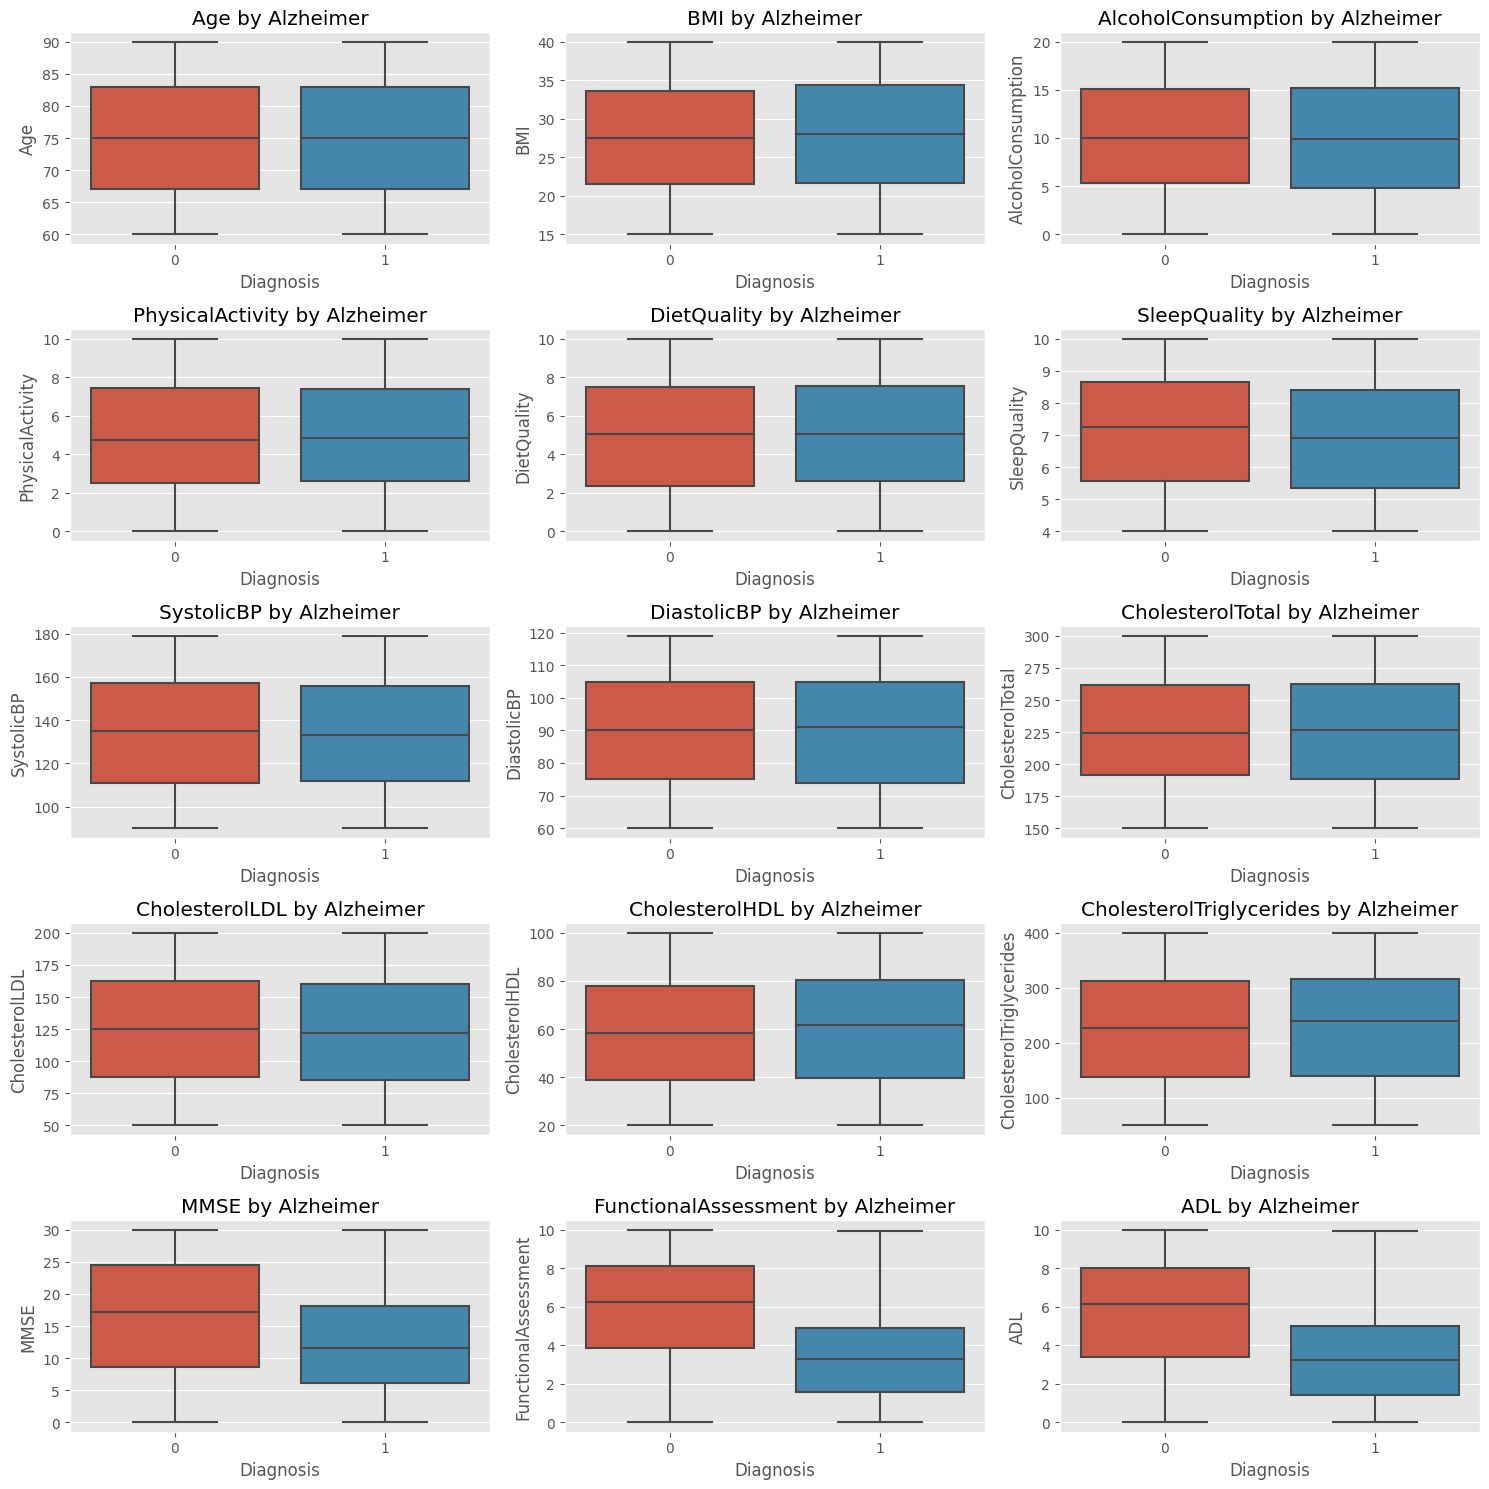

In [22]:
plt.figure(figsize=(15, 15)) 
for i, col in enumerate(numerical, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x='Diagnosis', y=col, data=df)
    plt.title(f'{col} by Alzheimer') 

plt.tight_layout()  
plt.show()

- The last three boxplots indicate that there is a difference between the means. We will apply the respective t-tests to ensure that these differences are statistically significant in confidence level 95%.
- We can claim the **Central Limit Theorem** to assume that the means follow the Gaussian distribution and apply t-tests

### T-Tests
We will run a statistical test to see if these differences is statistically significant.  


According to __Central Limit Theorem__,  when we repeatedly take independent samples from any population, regardless of its original distribution, and as long as the sample size is sufficiently large, the distribution of sample means will tend to approximate a normal distribution.

Assumptions: 
 - __Independence__: Observations within each sample must be independent of each other
 - __Identically Distributed__: Each observation should come from the same population and have the same probability distribution
 - __Large Sample Size__: The sample size should be sufficiently large (>30)

Since we meet these assumptions, we can claim the central limit therom that the means of our variables follow the gaussian distribution, so we are allowed to use parametric tests. 
We are going to test if the difference of the means of the two different classes is statistically significant in confidence level 95%.

In a z-test for two independent samples, the z-statistic is typically calculated using the difference between the sample means and the standard error of the difference. Here's the formula:  
 
$$z=\frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$


 $$ Rejected Area = \{ |z| > z_{\frac{a}{2}} \} $$    
 
The value of z being approximately 1.96 corresponds to the critical value for a two-tailed test at a significance level of 𝛼=0.05 is:
 $$ z_{0.025} = 1.96$$

In [23]:
def two_sample_z_test(var, factor):
    n1 = df[df[factor]==0].shape[0]
    n2 = df[df[factor]==1].shape[0]
    
    x1 = df[df[factor]==0][var].mean()
    x2 = df[df[factor]==1][var].mean()
    
    std1 = df[df[factor]==0][var].std()
    std2 = df[df[factor]==1][var].std()
    z = (x1-x2)/np.sqrt((std1**2/n1)+(std2**2/n2))
    print(f'z statistic: {z:.3f}')
    
    # 95% confidence level
    lower_critical_value = -1.96
    upper_critical_value = 1.96
    if z < lower_critical_value or z > upper_critical_value:
        print("There is a difference between the means of the two populations.")
    else:
        print("There is no significant difference between the means of the two populations.")
        


MMSE by Diagnosis
z statistic: 12.025
There is a difference between the means of the two populations.



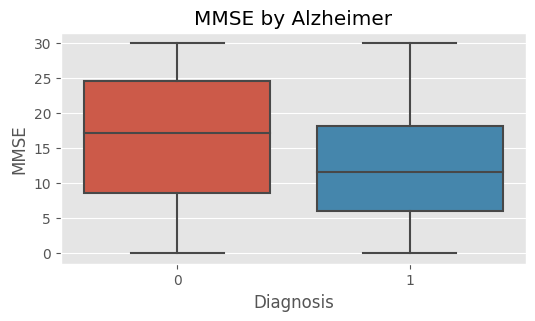


----------------------------------------------------------------------

FunctionalAssessment by Diagnosis
z statistic: 18.552
There is a difference between the means of the two populations.



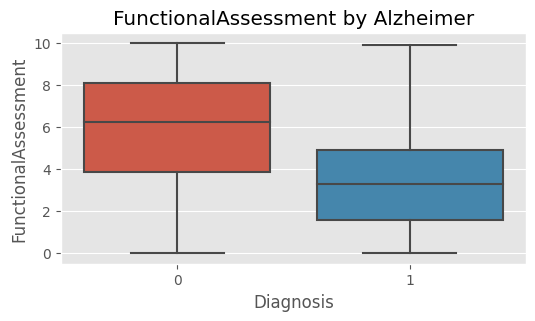


----------------------------------------------------------------------

ADL by Diagnosis
z statistic: 16.546
There is a difference between the means of the two populations.



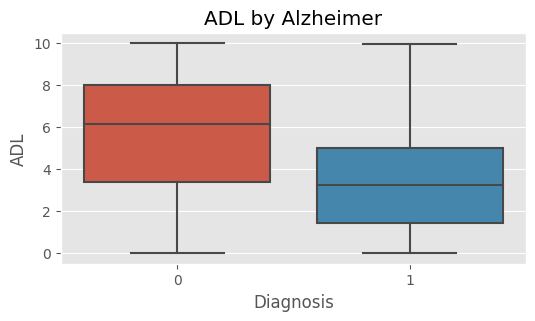


----------------------------------------------------------------------



In [24]:
# plt.style.use('ggplot')
cols = ['MMSE', 'FunctionalAssessment', 'ADL']
print("")
for col in cols:
    plt.figure(figsize=(6,3))
    print(f"{col} by Diagnosis")
    two_sample_z_test(col, 'Diagnosis')
    print("")
    sns.boxplot(x='Diagnosis', y=col, data=df)
    plt.title(f'{col} by Alzheimer')
    plt.show()
    print("")
    print("-"*70)
    print("")

People who have diagnosed with Alzheimer's disease tend to have:
-  Lower Mental State Examination (MMSE) scores (range: 0-30), indicating greater cognitive impairment.
-  Lower Functional Assessment score (range: 0-10), reflecting a decline in overall functional abilities.
-  Lower Activities of Daily Living (ADL) score (range: 0-10), signifying greater difficulties in performing daily tasks independently.